In [103]:
import numpy as np
import matplotlib.pyplot as plt
import geostat as geo
import pandas as pd

In [108]:
#mydata = np.genfromtxt('data/massilon-face2-universal_cord.csv', delimiter=',')
#mydata = np.genfromtxt('data/massilon-face6-universal_cord.txt',  delimiter=' ', skip_header=4)
d = pd.read_excel('data/massilon-face6-universal_cord.xlsx')

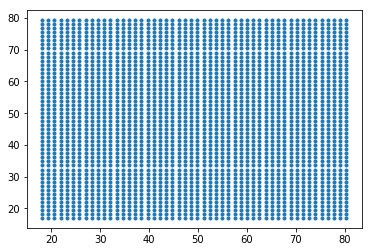

In [109]:
plt.plot(d.X,d.Y,'.')
plt.show()

x = np.array( [d.X,d.Y])

In [114]:
x = np.array( [d.X,d.Y]).transpose()
print(x.shape)
print(x)

(2500, 2)
[[ 80.36  79.26]
 [ 80.36  77.99]
 [ 80.36  76.72]
 ..., 
 [ 18.13  19.57]
 [ 18.13  18.3 ]
 [ 18.13  17.03]]


In [131]:
mydata = np.delete(mydata, 0, axis=0)

x = mydata[:,0]
y = mydata[:,2]
v = mydata[:,-3] # Scale 6.3 mm
n = len(v)

ValueError: Shape of passed values is (26, 2499), indices imply (26, 2500)

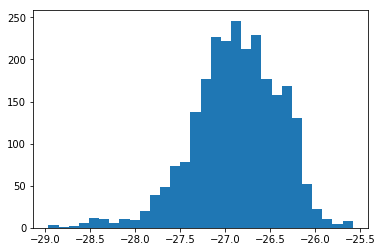

In [78]:
plt.hist(v,30)
plt.show()

In [ ]:
X = mydata[:,[0,2]] 
vario = geo.ExperimentalVariogram(X, v)

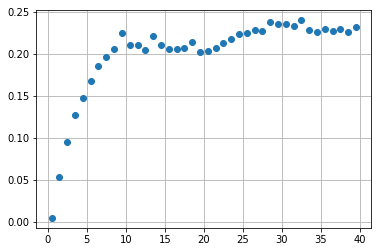

In [69]:
he,ve = vario(hmax=40,lag=1)

plt.plot(he,ve,'o')
plt.grid()
plt.show()

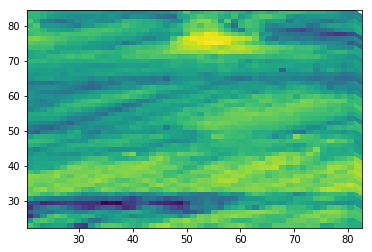

In [76]:
xx,yy,vv = np.copy(x), np.copy(y), np.copy(v)

xx.shape = (50,50)
yy.shape = (50,50)
vv.shape = (50,50)

plt.pcolormesh(xx,yy,vv)
plt.show()

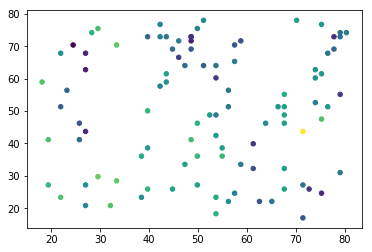

In [150]:
i = np.random.randint(0,2500,100)
plt.scatter(d.X[i],d.Y[i],20,c=v[i])
plt.show()

(100, 2)


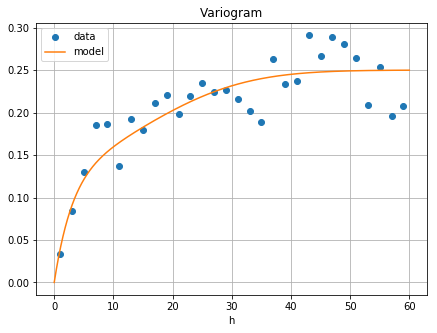

In [172]:
X = np.array([d.X[i],d.Y[i]]).transpose()
expvario = geo.ExperimentalVariogram(X, v[i])
print(X.shape)
he,ge = expvario(hmax=60.0,lag=2)

# Defines a variogram model: adapt the range, sill and type
#variomod = geo.variogram( 0.5, 8600, typ='linear' , nugget=0.1)
#variomod = geo.variogram( 0.4, 900, typ='spherical' , nugget=0.1)

variomod1 = geo.Variogram( 10, 0.15, typ='exponential' , nugget=0)
variomod2 = geo.Variogram( 40, 0.10, typ='gaussian' , nugget=0)

# Superposes the plot of the two curves for manual fitting
hplot = np.arange(0,60,0.01)

plt.figure(figsize=(7,5))
plt.plot(he,ge,'o',label='data')
plt.plot(hplot,variomod1(hplot)+variomod2(hplot),label='model')
plt.grid()
plt.legend()
plt.title('Variogram')
plt.xlabel('h')
plt.show()

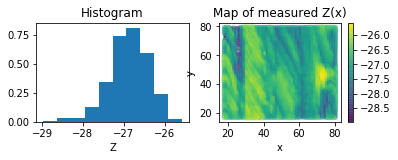

In [115]:

plt.subplot(221)
plt.hist(v, density=True, cumulative=False, histtype='bar')
plt.xlabel('Z')
plt.title('Histogram')

plt.subplot(222)
v.shape=(n,)
s = v-np.min(v)
plt.scatter(x[:,0], x[:,1], s=s*10, c=v, alpha=0.5)
plt.title('Map of measured Z(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [37]:
print(np.sqrt(2500))

50.0
